# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [59]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import seaborn as sns
%matplotlib inline

In [60]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [61]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [62]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [63]:
df = data[['race', 'call']]
df.head()

,race,call
0,w,0.0
1,w,0.0
2,b,0.0
3,b,0.0
4,w,0.0


In [64]:
df_b = df[df.race == 'b']
df_w = df[df.race == 'w']

## 1. What test is appropriate for this problem? Does CLT apply?

In [65]:
stats.describe(df_b['call'])

DescribeResult(nobs=2435, minmax=(0.0, 1.0), mean=0.064476386, variance=0.060343958, skewness=3.5466151237487793, kurtosis=10.578476616107098)

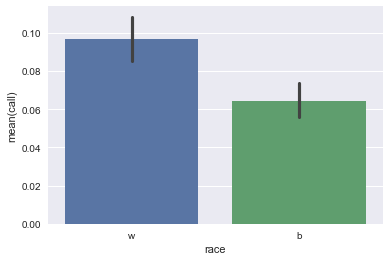

In [66]:
sns.barplot(data=df, x='race', y='call')

In [67]:
p_b=stats.describe(df_b.call).mean
p_w=stats.describe(df_w.call).mean
nobs_b=stats.describe(df_b.call).nobs
nobs_w=stats.describe(df_w.call).nobs

In [68]:
print("Proportion of black getting a call back = ",p_b)
print("Proportion of white getting a call back= ",p_w)


Proportion of black getting a call back =  0.0644764
Proportion of white getting a call back=  0.0965092


## 2. What are the null and alternate hypotheses?

Let's formulate the null and alternative hypotheses.

H0:p_w is equal to p_b (Race has no impact on the rate of callbacks)

HA:p_w is not equal to p_b (Race has an impact on the rate of callbacks)
 

## 3. Compute margin of error, confidence interval, and p-value.

In [69]:
z = 1.96
margin = z * math.sqrt( ( p_w*(1-p_w) / nobs_b) + (p_b*(1-p_b)/nobs_w) )

print ("Margin = ", margin)

Margin =  0.015255406348684322


In [70]:
conf_int =(p_w-p_b-z*margin, p_w-p_b+z*margin)
print('Confidence Interval: {}'.format(conf_int))

Confidence Interval: (0.0021322584116393074, 0.061933451298481851)


In [71]:
from statsmodels.stats.proportion import proportions_ztest as pz
callback_b = len(df_b[df_b.call == 1])
callback_w = len(df_w[df_w.call == 1])
num_b = len(df_b)
num_w = len(df_w)
pz(np.array([callback_b,callback_w]),np.array([num_b,num_w]),value=0)

(-4.1084121524343464, 3.9838868375850767e-05)

## 4. Write a story describing the statistical significance in the context or the original problem.
## 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

Because the p-value is very small, therefore we reject the Null hypothesis.

This analyses supports the alternative hypothesis that black-sounding names do not have the same callback as white-sounding names. It does not mean race/name is the most important factor in callback success. It does imply race has a significant impact on the rate of callbacks for resumes.
We can do some feature importance analyses to find which factor is the most important one for callback rate.